In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from scipy import stats

In [2]:
# train data
path = "../data/house_price/"
train_path = path + 'train.csv'
test_path = path + 'test.csv'
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

df_train.shape

(1460, 81)

Notice that there are four main element:
- OverallQUal
- YearBuilt
- TotalBsmtSF
- GrLivArea

# Data preprocessing

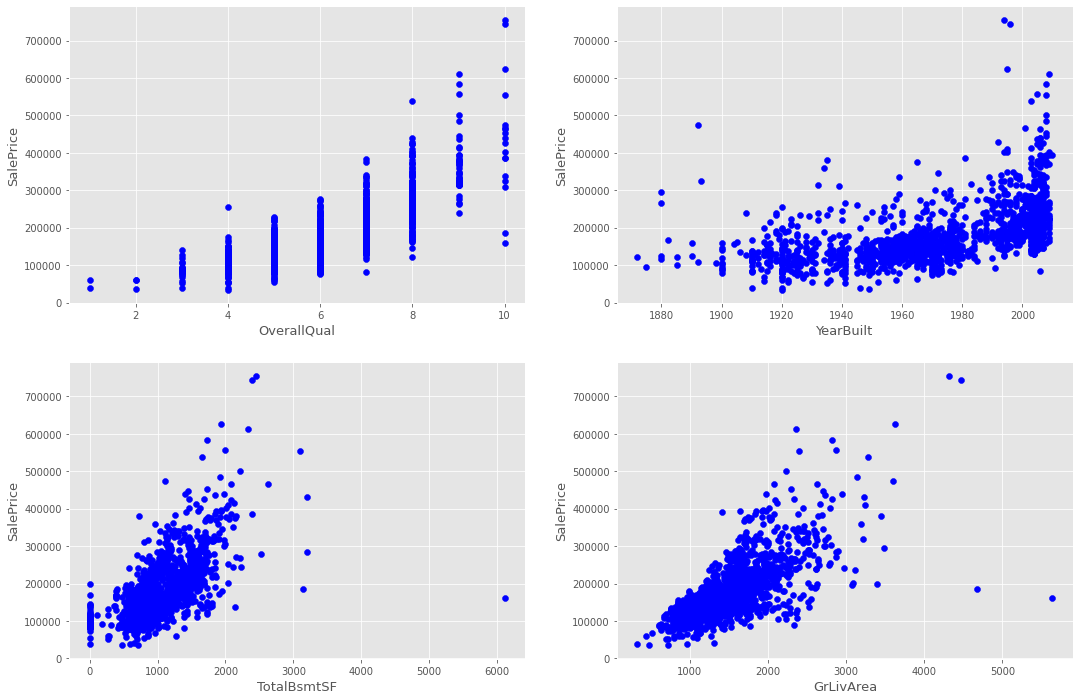

In [3]:
plt.figure(figsize=(18,12))

plt.subplot(2, 2, 1)
plt.scatter(x=df_train.OverallQual, y=df_train.SalePrice,color='b') ##可以用来观察存在线型的关系
plt.xlabel("OverallQual", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)

plt.subplot(2, 2, 2)
plt.scatter(x=df_train.YearBuilt, y=df_train.SalePrice,color='b') ##可以用来观察存在线型的关系
plt.xlabel("YearBuilt", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)

plt.subplot(2, 2, 3)
plt.scatter(x=df_train.TotalBsmtSF, y=df_train.SalePrice,color='b') ##可以用来观察存在线型的关系
plt.xlabel("TotalBsmtSF", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)

plt.subplot(2, 2, 4)
plt.scatter(x=df_train.GrLivArea, y=df_train.SalePrice,color='b') ##可以用来观察存在线型的关系
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)    

plt.show()

In [4]:
# abnormal data 
df_train.drop(df_train[(df_train['OverallQual']<5) & (df_train['SalePrice']>200000)].index,inplace=True)
df_train.drop(df_train[(df_train['YearBuilt']<1900) & (df_train['SalePrice']>300000)].index,inplace=True)
df_train.drop(df_train[(df_train['YearBuilt']<1980) & (df_train['SalePrice']>650000)].index,inplace=True)
df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']>200000)].index,inplace=True)
df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<200000)].index,inplace=True)

df_train.reset_index(drop=True,inplace=True)

train_id = df_train['Id']
test_id = df_test['Id']
df_train.drop('Id',axis=1,inplace=True)
df_test.drop('Id',axis=1,inplace=True)

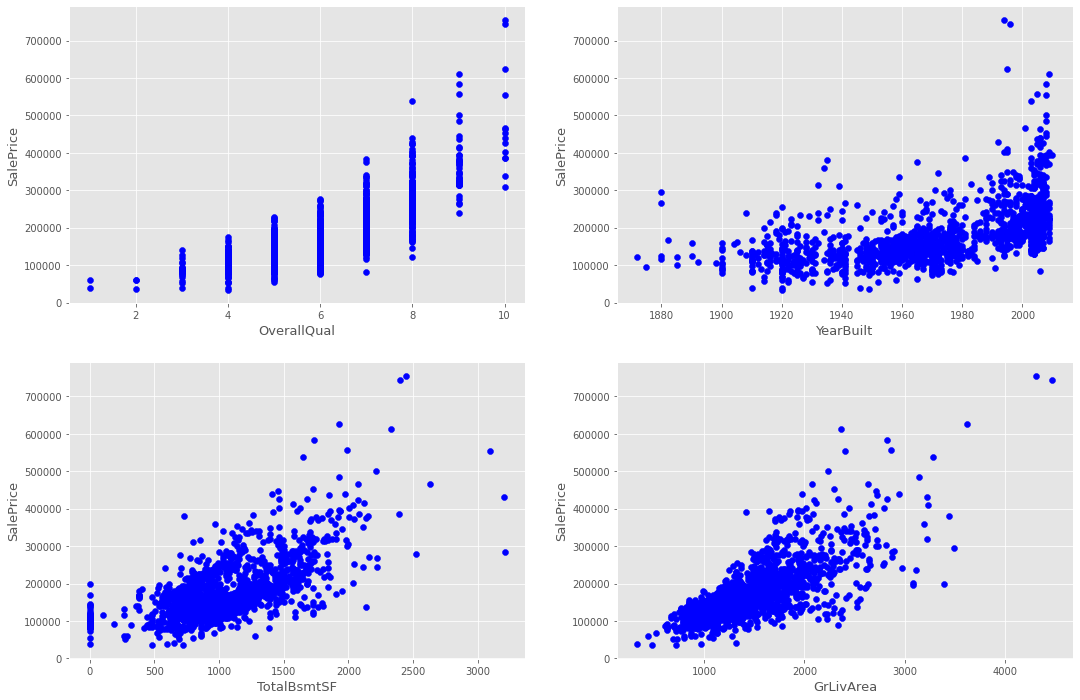

In [5]:
plt.figure(figsize=(18,12))

plt.subplot(2, 2, 1)
plt.scatter(x=df_train.OverallQual, y=df_train.SalePrice,color='b') ##可以用来观察存在线型的关系
plt.xlabel("OverallQual", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)

plt.subplot(2, 2, 2)
plt.scatter(x=df_train.YearBuilt, y=df_train.SalePrice,color='b') ##可以用来观察存在线型的关系
plt.xlabel("YearBuilt", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)

plt.subplot(2, 2, 3)
plt.scatter(x=df_train.TotalBsmtSF, y=df_train.SalePrice,color='b') ##可以用来观察存在线型的关系
plt.xlabel("TotalBsmtSF", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)

plt.subplot(2, 2, 4)
plt.scatter(x=df_train.GrLivArea, y=df_train.SalePrice,color='b') ##可以用来观察存在线型的关系
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)    

plt.show()


mu = 180580.20, sigma = 79059.82



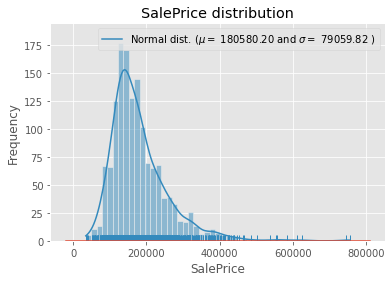

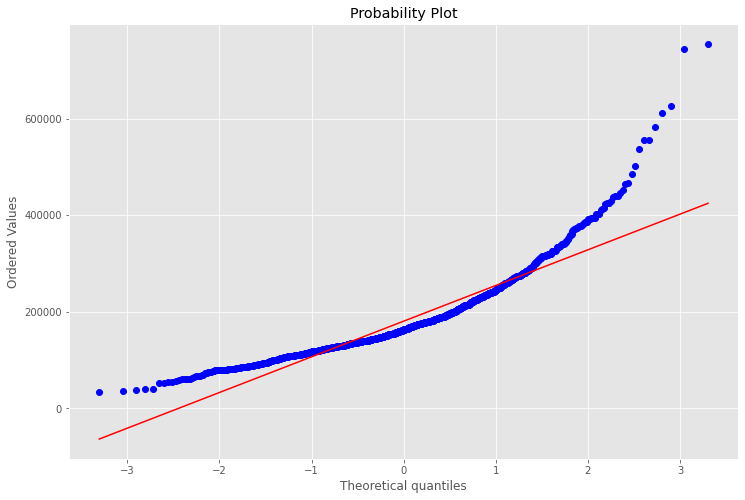

In [6]:
def plot_distribution(data, obj_col):
    # sns.distplot(data[obj_col],fit=stats.norm)
    sns.histplot(data[obj_col],kde=True) # lack norm dis as reference
    sns.kdeplot(data[obj_col])
    sns.rugplot(data[obj_col])

    (mu, sigma) = stats.norm.fit(data[obj_col])
    print("\nmu = {:.2f}, sigma = {:.2f}\n".format(mu,sigma))

    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
    plt.ylabel('Frequency')
    plt.title(obj_col+' distribution')

    fig = plt.figure(figsize=(12,8))
    res = stats.probplot(data[obj_col],plot=plt)
    plt.show()

plot_distribution(df_train, 'SalePrice')

In [7]:
df_train.skew(axis=0).nlargest(n=10)

MiscVal          24.435000
PoolArea         15.932369
LotArea          12.784981
3SsnPorch        10.286243
LowQualFinSF      9.186759
KitchenAbvGr      4.479607
BsmtFinSF2        4.246917
BsmtHalfBath      4.095176
ScreenPorch       4.094348
EnclosedPorch     3.083098
dtype: float64


mu = 12.02, sigma = 0.40



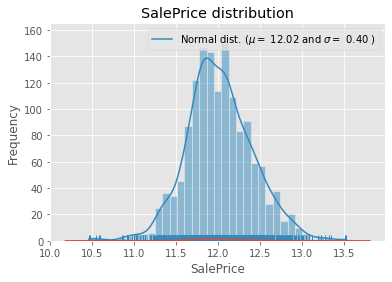

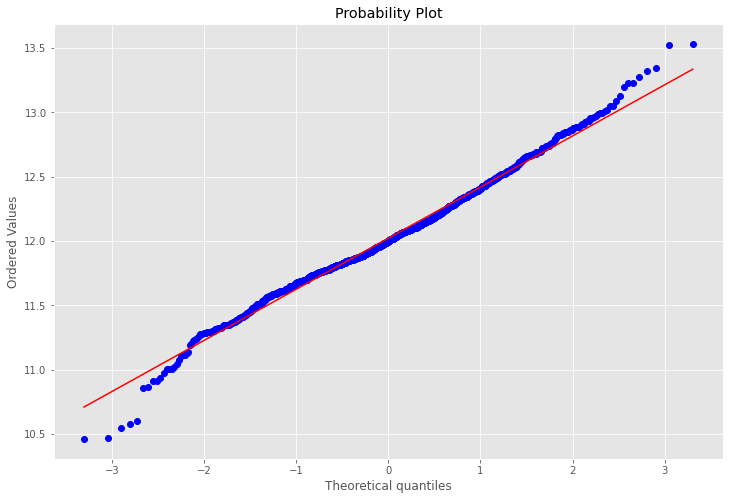

In [8]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
plot_distribution(df_train, 'SalePrice')

Wash data, concat for brief

deal with missing data with:
- del
- interpolation
- predict with other params
- __More Precise__: map to a higher dim space(add 'if is missing')

In [9]:
all_data=pd.concat([df_train,df_test],axis=0)
all_data.reset_index(drop=True, inplace=True)

print(df_train.shape)
print(df_test.shape)
print(all_data.shape)

(1455, 80)
(1459, 79)
(2914, 80)


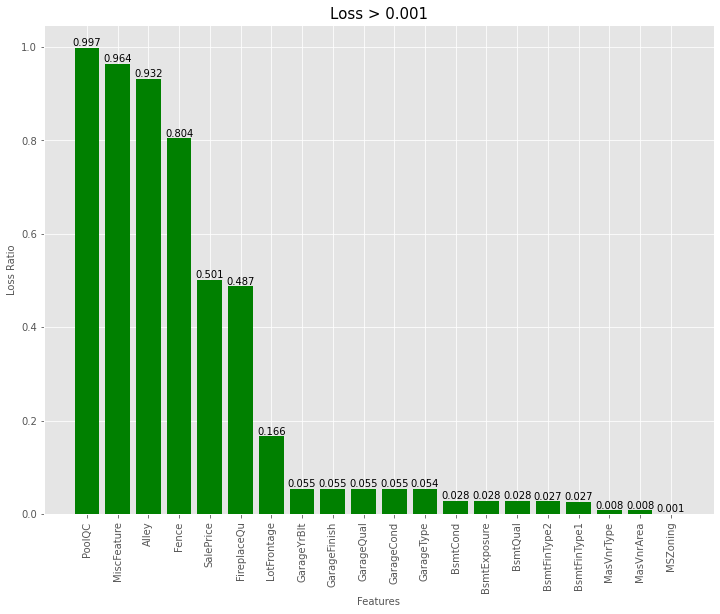

In [10]:
# missing data
count=all_data.isnull().sum().sort_values(ascending=False)
ratio=count/len(all_data)
nulldata=pd.concat([count,ratio],axis=1,keys=['count','ratio'])
# nulldata[nulldata.ratio>0]

def null_hist(data):
    cols = list(data.columns)
    null_percents = []

    for col in cols:
        null_percent = np.uint8(data[col].isnull()).sum()/len(data[col].values)
        null_percents.append(null_percent)
    
    plot_data = pd.Series(null_percents, index=cols)
    plot_data = plot_data[plot_data.values>0.001]
    plot_data.sort_values(ascending=False, inplace=True)
    
    plot_x = plot_data.index
    plot_y = plot_data.values

    fig = plt.figure(figsize=(12,9))
    plt.bar(plot_x,plot_y,color='g')

    plt.title("Loss > 0.001",fontsize=15)
    plt.xlabel('Features',fontsize=10)
    plt.ylabel('Loss Ratio',fontsize=10)

    plt.xticks(rotation=90)
    
    for a, b in zip(plot_x,plot_y.round(3)):
        plt.text(a,b,s=b,ha='center',va='bottom')

    plt.show()


null_hist(all_data)

In [11]:
# string data, NA because there is no such property
str_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass']

for col in str_cols:
    all_data[col].fillna("None",inplace=True)

In [12]:
# numerical data
num_cols = ["BsmtUnfSF","TotalBsmtSF","BsmtFinSF2","BsmtFinSF1","BsmtFullBath","BsmtHalfBath","MasVnrArea","GarageCars","GarageArea"]
for col in num_cols:
    all_data[col].fillna(0,inplace=True)
# years
yr_cols = ['GarageYrBlt']
for col in yr_cols:
    all_data[col].fillna(all_data[col].mode()[0],inplace=True)
# other
other_cols = ["MSZoning", "Electrical", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"]
for col in other_cols:
    all_data[col].fillna(all_data[col].mode()[0], inplace=True)
# shared data
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [13]:
# 'utilities'
pd.DataFrame(all_data['Utilities']).value_counts()

Utilities
AllPub       2911
NoSeWa          1
dtype: int64

In [14]:
all_data = all_data.drop(["Utilities"],axis=1)

In [15]:
# Functional
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [16]:
# check null
count=all_data.isnull().sum().sort_values(ascending=False)
ratio=count/len(all_data)
nulldata=pd.concat([count,ratio],axis=1,keys=['count','ratio'])
nulldata[nulldata.ratio>0]

,count,ratio
SalePrice,1459,0.500686


In [17]:
# str seperated in order -> numeric
all_data["ExterQual"].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [18]:
def custom_coding(x):
    if(x=='Ex'):
        r = 0
    elif(x=='Gd'):
        r = 1
    elif(x=='TA'):
        r = 2
    elif(x=='Fa'):
        r = 3
    elif(x=='None'):
        r = 4
    else:
        r = 5
    return r

cols = ['BsmtCond','BsmtQual','ExterCond','ExterQual','FireplaceQu','GarageCond','GarageQual','HeatingQC','KitchenQual','PoolQC']
for col in cols:
    all_data[col] = all_data[col].apply(custom_coding)

In [19]:
# useless numerics -> str
cols = ['MSSubClass', 'YrSold', 'MoSold', 'OverallCond', "MSZoning", "BsmtFullBath", "BsmtHalfBath", "HalfBath","Functional", "Electrical", "KitchenQual","KitchenAbvGr", "SaleType", "Exterior1st", "Exterior2nd", "YearBuilt","YearRemodAdd", "GarageYrBlt","BedroomAbvGr","LowQualFinSF"]
for col in cols:
    all_data[col] = all_data[col].astype(str) 

In [20]:
from sklearn.preprocessing import LabelEncoder

# str, years -> numeric
yr_cols = ["YearBuilt", "YearRemodAdd", 'GarageYrBlt', "YrSold", 'MoSold']
for col in yr_cols:
    all_data[col] = LabelEncoder().fit_transform(all_data[col])

# base for new features
lab_cols = ['Heating','BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','Exterior1st','MasVnrType','Foundation', 'GarageType','SaleType','SaleCondition']

for col in lab_cols:
    new_col = "labfit_" + col
    all_data[new_col] = LabelEncoder().fit_transform(all_data[col])

In [21]:
# create new features

# Total House Area
all_data['TotalHouseArea'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# Year Since Remodel
all_data['YearsSinceRemodel'] = all_data['YrSold'].astype(int) - all_data['YearRemodAdd'].astype(int)

# Total Home Quality
all_data['Total_Home_Quality'] = all_data['OverallQual'].astype(int) + all_data['OverallCond'].astype(int)

# If Have some Area
all_data['HasWoodDeck'] = (all_data['WoodDeckSF'] == 0) * 1
all_data['HasOpenPorch'] = (all_data['OpenPorchSF'] == 0) * 1
all_data['HasEnclosedPorch'] = (all_data['EnclosedPorch'] == 0) * 1
all_data['Has3SsnPorch'] = (all_data['3SsnPorch'] == 0) * 1
all_data['HasScreenPorch'] = (all_data['ScreenPorch'] == 0) * 1

# Others
all_data["TotalAllArea"] = all_data["TotalHouseArea"] + all_data["GarageArea"]                 # 房屋总面积加车库面积
all_data["TotalHouse_and_OverallQual"] = all_data["TotalHouseArea"] * all_data["OverallQual"]  # 房屋总面积和房屋材质指标乘积
all_data["GrLivArea_and_OverallQual"] = all_data["GrLivArea"] * all_data["OverallQual"]        # 地面上居住总面积和房屋材质指标乘积
all_data["LotArea_and_OverallQual"] = all_data["LotArea"] * all_data["OverallQual"]            # 地段总面积和房屋材质指标乘积
all_data["MSZoning_and_TotalHouse"] = all_data["labfit_MSZoning"] * all_data["TotalHouseArea"] # 一般区域分类与房屋总面积的乘积
all_data["MSZoning_and_OverallQual"] = all_data["labfit_MSZoning"] + all_data["OverallQual"]   # 一般区域分类指标与房屋材质指标之和
all_data["MSZoning_and_YearBuilt"] = all_data["labfit_MSZoning"] + all_data["YearBuilt"]       # 一般区域分类指标与初始建设年份之和
## 地理邻近环境位置指标与总房屋面积之积
all_data["Neighborhood_and_TotalHouse"] = all_data["labfit_Neighborhood"] * all_data["TotalHouseArea"]
all_data["Neighborhood_and_OverallQual"] = all_data["labfit_Neighborhood"] + all_data["OverallQual"]  
all_data["Neighborhood_and_YearBuilt"] = all_data["labfit_Neighborhood"] + all_data["YearBuilt"]
all_data["BsmtFinSF1_and_OverallQual"] = all_data["BsmtFinSF1"] * all_data["OverallQual"]      # 1型成品的面积和房屋材质指标乘积
## 家庭功能评级指标与房屋总面积的乘积
all_data["Functional_and_TotalHouse"] = all_data["labfit_Functional"] * all_data["TotalHouseArea"]
all_data["Functional_and_OverallQual"] = all_data["labfit_Functional"] + all_data["OverallQual"]
all_data["TotalHouse_and_LotArea"] = all_data["TotalHouseArea"] + all_data["LotArea"]
## 房屋与靠近公路或铁路指标乘积系数
all_data["Condition1_and_TotalHouse"] = all_data["labfit_Condition1"] * all_data["TotalHouseArea"]
all_data["Condition1_and_OverallQual"] = all_data["labfit_Condition1"] + all_data["OverallQual"]
all_data["Bsmt"] = all_data["BsmtFinSF1"] + all_data["BsmtFinSF2"] + all_data["BsmtUnfSF"]     # 地下室相关面积总和指标
all_data["Rooms"] = all_data["FullBath"]+all_data["TotRmsAbvGrd"]                              # 地面上全浴室和地面上房间总数量之和
## 开放式门廊、围廊、三季门廊、屏风玄关总面积
all_data["PorchArea"] = all_data["OpenPorchSF"]+all_data["EnclosedPorch"]+ \
                        all_data["3SsnPorch"]+all_data["ScreenPorch"]    
## 全部功能区总面积（房屋、地下室、车库、门廊等）
all_data["TotalPlace"] = all_data["TotalAllArea"] + all_data["PorchArea"]       

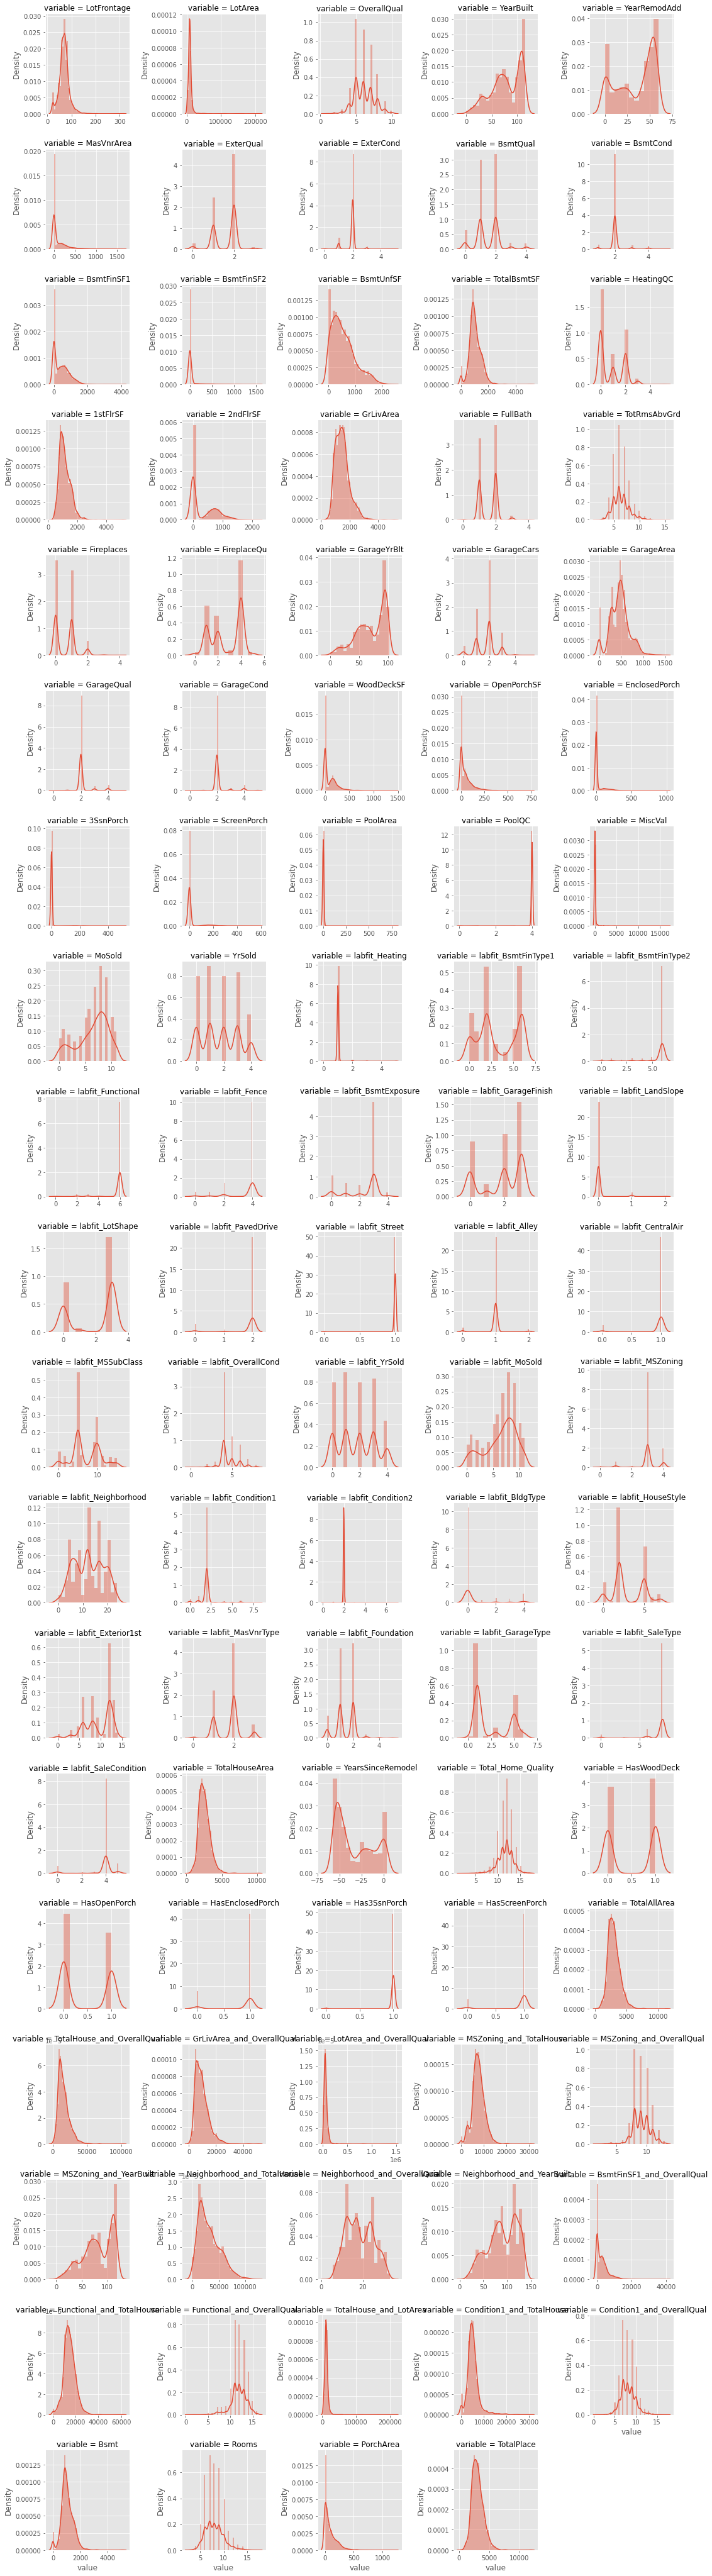

In [22]:
import warnings
warnings.filterwarnings('ignore') # future warning for sns.distplot

# distribution transformation for continue numerical data

num_features = all_data.select_dtypes(include=['int64','float64','int32']).copy()
num_features.drop(['SalePrice'],axis=1,inplace=True)               # 去掉目标值房价列

num_feature_names = list(num_features.columns)

num_features_data = pd.melt(all_data, value_vars=num_feature_names)
g = sns.FacetGrid(num_features_data, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")
plt.show()

In [23]:
from scipy.stats import norm, skew       
skewed_feats = all_data[num_feature_names].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness[skewness["Skew"].abs()>0.75].nlargest(n=5,columns='Skew')

,Skew
MiscVal,21.928383
PoolArea,17.679480
LotArea,13.278498
labfit_Condition2,12.450591
TotalHouse_and_LotArea,12.325165


In [24]:
skew_cols = list(skewness[skewness["Skew"].abs()>1].index)
for col in skew_cols:
    #all_data[col] = boxcox1p(all_data[col], 0.15)                                  # 偏度超过阈值的特征做box-cox变换
    all_data[col] = np.log1p(all_data[col])

In [25]:
# onehot
all_data = pd.get_dummies(all_data)

In [26]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Columns: 394 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(55), int64(40), uint8(299)
memory usage: 2.9 MB


All in numerical form. Done for the part.

# Dimension reduction

In [27]:
index_train = df_train.index
def split_data(all_data,index_train):
    cols = list(all_data.columns)
    for col in cols:
        all_data[col].values[np.isinf(all_data[col].values)] = all_data[col].mode()[0]
    
    train_data = all_data[:max(index_train)+1]
    test_data = all_data[max(index_train)+1:]

    y_train = train_data['SalePrice']

    X_train = train_data.copy()
    X_test = test_data.copy()
    X_train.drop(['SalePrice'],axis=1,inplace=True)
    X_test .drop(['SalePrice'],axis=1,inplace=True)

    return X_train, X_test, y_train
    
X_train, X_test, y_train = split_data(all_data,index_train)

In [28]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit(X_train).transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0008)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0008)

In [30]:
lasso.coef_.shape

(393,)

In [31]:
## 索引和重要性做成dataframe形式
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=all_data.drop(["SalePrice"],axis=1).columns) 
## 由高到低进行排序
FI_lasso.sort_values("Feature Importance",ascending=False).round(5)

,Feature Importance
Neighborhood_Crawfor,0.09587
Total_Home_Quality,0.08488
TotalPlace,0.08386
GrLivArea,0.05686
KitchenQual_0,0.05523
...,...
MSSubClass_30,-0.02662
BsmtUnfSF,-0.03138
MSZoning_RM,-0.03841
CentralAir_N,-0.03903


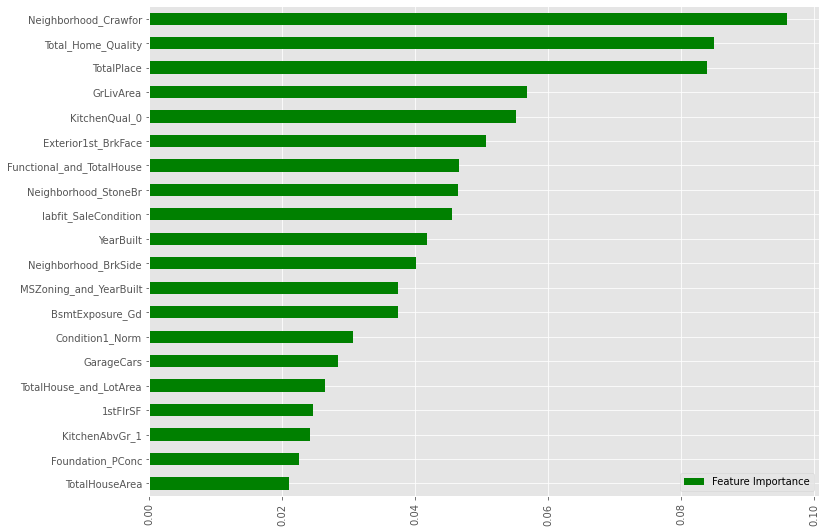

(393, 1)


In [32]:
FI_lasso[FI_lasso["Feature Importance"]>=0.02].sort_values("Feature Importance").plot(kind="barh",figsize=(12,9), color='g')
plt.xticks(rotation=90)
plt.show()

FI_index = FI_lasso.index
FI_val = FI_lasso["Feature Importance"].values
FI_lasso = pd.DataFrame(FI_val, columns = ['Feature Importance'], index = FI_index)
print(FI_lasso.shape)

In [33]:
choose_cols = FI_lasso.index.tolist()
choose_cols.append("SalePrice")
choose_data = all_data[choose_cols].copy()
choose_data.shape

(2914, 394)

# Modeling

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import math
def get_mse(records_real, records_predict):
    ## 均方误差 估计值与真值 偏差
    if len(records_real) == len(records_predict):
        return sum([(x - y) ** 2 for x, y in zip(records_real, records_predict)]) / len(records_real)
    else:
        return None

def get_rmse(records_real, records_predict):
    ## 均方根误差：是均方误差的算术平方根
    mse = get_mse(records_real, records_predict)
    if mse:
        return math.sqrt(mse)
    else:
        return None

#定义交叉验证的策略，以及评估函数
def rmse_cv(model,X,y):
    ## 针对各折数据集的测试结果的均方根误差
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))   # cv 代表数据划分的KFold折数
    return rmse

In [35]:
X_train, X_test, y_train = split_data(choose_data, index_train)
X_test.shape, X_train.shape, y_train.shape

((1459, 393), (1455, 393), (1455,))

In [36]:
# save dealt data
X_test.to_csv(r'../data/house_price/X_test.csv',index=False)
X_train.to_csv(r'../data/house_price/X_train.csv',index=False)
y_train.to_csv(r'../data/house_price/y_train.csv',index=False)
print("Saved")

Saved


In [37]:
X_train, X_test, y_train = split_data(choose_data, index_train)
scaler = RobustScaler()
x_train = scaler.fit(X_train).transform(X_train)  #训练样本特征归一化
x_test = scaler.transform(X_test)                 #测试集样本特征归一化
y_train = y_train.values.reshape(-1,1)

In [38]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=375)
x_train = pca_model.fit_transform(x_train)
x_test = pca_model.transform(x_test)

In [39]:
# stacking with ElasticNet, SVR, BayesianRidge, KernelRidge, Lasso, Ridge
# 定义先验参数网格搜索验证方法
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        # 打印最佳参数及对应的评估指标
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        
        # 打印单独的各参数组合参数及对应的评估指标
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [40]:
param_grid = {'alpha': [0.0004,0.0005,0.0006,0.0007,0.0008,0.0009],'max_iter':[10000],'random_state':[1]}
grid(Lasso()).grid_get(x_train, y_train, param_grid)

{'alpha': 0.0005, 'max_iter': 10000, 'random_state': 1} 0.10979304563355409
                                              params  mean_test_score  \
0  {'alpha': 0.0004, 'max_iter': 10000, 'random_s...         0.109920   
1  {'alpha': 0.0005, 'max_iter': 10000, 'random_s...         0.109793   
2  {'alpha': 0.0006, 'max_iter': 10000, 'random_s...         0.110041   
3  {'alpha': 0.0007, 'max_iter': 10000, 'random_s...         0.110526   
4  {'alpha': 0.0008, 'max_iter': 10000, 'random_s...         0.111078   
5  {'alpha': 0.0009, 'max_iter': 10000, 'random_s...         0.111691   

   std_test_score  
0        0.001492  
1        0.001473  
2        0.001446  
3        0.001436  
4        0.001443  
5        0.001452  


In [41]:
param_grid = {'alpha':[35,40,45,50,55,60,65,70,80,90]}
grid(Ridge()).grid_get(x_train, y_train, param_grid)

{'alpha': 35} 0.11054273161679254
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.110543        0.001408
1  {'alpha': 40}         0.110686        0.001400
2  {'alpha': 45}         0.110831        0.001393
3  {'alpha': 50}         0.110976        0.001388
4  {'alpha': 55}         0.111118        0.001383
5  {'alpha': 60}         0.111259        0.001380
6  {'alpha': 65}         0.111396        0.001377
7  {'alpha': 70}         0.111530        0.001374
8  {'alpha': 80}         0.111790        0.001369
9  {'alpha': 90}         0.112040        0.001366


In [42]:
param_grid = {'C':[11,12,13,14,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]}
grid(SVR()).grid_get(x_train, y_train, param_grid)

In [ ]:
param_grid = {'alpha':[0.2,0.3,0.4,0.5], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1,1.2]}#定义好的参数，用字典来表示
grid(KernelRidge()).grid_get(x_train, y_train, param_grid)

{'alpha': 0.4, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'} 0.1088865285097335
                                               params  mean_test_score  \
0   {'alpha': 0.2, 'coef0': 0.8, 'degree': 3, 'ker...         0.109099   
1   {'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kerne...         0.109163   
2   {'alpha': 0.2, 'coef0': 1.2, 'degree': 3, 'ker...         0.109494   
3   {'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'ker...         0.109307   
4   {'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kerne...         0.108935   
5   {'alpha': 0.3, 'coef0': 1.2, 'degree': 3, 'ker...         0.109004   
6   {'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'ker...         0.109798   
7   {'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kerne...         0.109024   
8   {'alpha': 0.4, 'coef0': 1.2, 'degree': 3, 'ker...         0.108887   
9   {'alpha': 0.5, 'coef0': 0.8, 'degree': 3, 'ker...         0.110424   
10  {'alpha': 0.5, 'coef0': 1, 'degree': 3, 'kerne...         0.109247   
11  {'alpha': 0.5, 'coef0':

In [ ]:
param_grid = {'alpha':[0.0005,0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3,0.5,0.7],'max_iter':[10000],'random_state':[3]}
grid(ElasticNet()).grid_get(x_train, y_train, param_grid)

{'alpha': 0.0008, 'l1_ratio': 0.5, 'max_iter': 10000, 'random_state': 3} 0.10991425769365597
                                               params  mean_test_score  \
0   {'alpha': 0.0005, 'l1_ratio': 0.08, 'max_iter'...         0.115238   
1   {'alpha': 0.0005, 'l1_ratio': 0.1, 'max_iter':...         0.114791   
2   {'alpha': 0.0005, 'l1_ratio': 0.3, 'max_iter':...         0.111624   
3   {'alpha': 0.0005, 'l1_ratio': 0.5, 'max_iter':...         0.110481   
4   {'alpha': 0.0005, 'l1_ratio': 0.7, 'max_iter':...         0.110084   
5   {'alpha': 0.0008, 'l1_ratio': 0.08, 'max_iter'...         0.113414   
6   {'alpha': 0.0008, 'l1_ratio': 0.1, 'max_iter':...         0.112920   
7   {'alpha': 0.0008, 'l1_ratio': 0.3, 'max_iter':...         0.110433   
8   {'alpha': 0.0008, 'l1_ratio': 0.5, 'max_iter':...         0.109914   
9   {'alpha': 0.0008, 'l1_ratio': 0.7, 'max_iter':...         0.109926   
10  {'alpha': 0.004, 'l1_ratio': 0.08, 'max_iter':...         0.110024   
11  {'alpha': 0.004

In [ ]:
#指定每一个算法的参数
lasso = Lasso(alpha=0.0004,random_state=1,max_iter=10000)
ridge = Ridge(alpha=35)
svr = SVR(gamma= 0.0004,kernel='rbf',C=14,epsilon=0.009)
ker = KernelRidge(alpha=0.4 ,kernel='polynomial',degree=3 , coef0=1.2)
ela = ElasticNet(alpha=0.004,l1_ratio=0.08,random_state=3,max_iter=10000)
bay = BayesianRidge()
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,learning_rate=0.05, max_depth=3,
                   min_child_weight=1.7817, n_estimators=2200,reg_alpha=0.4640, 
                   reg_lambda=0.8571,subsample=0.5213, silent=1,random_state =7, nthread = -1)
lgbm = LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05, n_estimators=700,max_bin = 55,
                     bagging_fraction = 0.8,bagging_freq = 5, feature_fraction = 0.25,feature_fraction_seed=9, 
                     bagging_seed=9,min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)
GBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)

In [ ]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    ##=============== 参数说明 ================##
    # mod --- 堆叠过程的第一层中的算法
    # meta_model --- 堆叠过程的第二层中的算法，也称次学习器
    
    def __init__(self,mod,meta_model):
        self.mod = mod                                                # 首层学习器模型
        self.meta_model = meta_model                                  # 次学习器模型
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)    # 这就是堆叠的最大特征进行了几折的划分
    
    ## 训练函数
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]          # self.saved_model包含所有第一层学习器
        oof_train = np.zeros((X.shape[0], len(self.mod)))      # 维度：训练样本数量*模型数量，训练集的首层预测值
        
        for i,model in enumerate(self.mod):                    #返回的是索引和模型本身
            for train_index, val_index in self.kf.split(X,y):  #返回的是数据分割成分（训练集和验证集对应元素）的索引
                renew_model = clone(model)                     #模型的复制
                renew_model.fit(X[train_index], y[train_index])           #对分割出来的训练集数据进行训练
                self.saved_model[i].append(renew_model)                   #把模型添加进去
                #oof_train[val_index,i] = renew_model.predict(X[val_index]).reshape(-1,1) #用来预测验证集数据
                
                val_prediction = renew_model.predict(X[val_index]).reshape(-1,1)    # 验证集的预测结果，注：结果是没有索引的
                
                for temp_index in range(val_prediction.shape[0]):
                    oof_train[val_index[temp_index],i] = val_prediction[temp_index] #用来预测验证集数据的目标值
                
        self.meta_model.fit(oof_train,y)                       # 次学习器模型训练，这里只是用到了首层预测值作为特征
        return self
    
    ## 预测函数
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model])        #得到的是整个测试集的首层预测值
        return self.meta_model.predict(whole_test)            # 返回次学习器模型对整个测试集的首层预测值特征的最终预测结果              
    
    ## 获取首层学习结果的堆叠特征
    def get_oof(self,X,y,test_X):                 
        oof = np.zeros((X.shape[0],len(self.mod)))                #初始化为0
        test_single = np.zeros((test_X.shape[0],5))               #初始化为0 
        #display(test_single.shape)
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):                       #i是模型
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):          #j是所有划分好的的数据
                clone_model = clone(model)                                            #克隆模块，相当于把模型复制一下
                clone_model.fit(X[train_index],y[train_index])                        #把分割好的数据进行训练
                
                val_prediction = clone_model.predict(X[val_index]).reshape(-1,1)      # 验证集的预测结果，注：结果是没有索引的
                for temp_index in range(val_prediction.shape[0]):
                    oof[val_index[temp_index],i] = val_prediction[temp_index]         #用来预测验证集数据
                    
                #oof[val_index,i] = clone_model.predict(X[val_index]).reshape(-1,1)    #对验证集进行预测
                # test_single[:,j] = clone_model.predict(test_X).reshape(-1,1)           #对测试集进行预测
                
                test_prediction = clone_model.predict(test_X).reshape(-1,1)           #对测试集进行预测
                
                # display(test_prediction.shape)
                test_single[:,j] = test_prediction[:,0]
            test_mean[:,i] = test_single.mean(axis=1)                                  #测试集算好均值
        return oof, test_mean

In [ ]:
from sklearn.impute import SimpleImputer

stack_model = stacking(mod=[ela,svr,bay,lasso,ridge,ker], meta_model=ker)

x_train = SimpleImputer().fit_transform(x_train)
y_train = SimpleImputer().fit_transform(y_train.reshape(-1,1)).ravel()

score = rmse_cv(stack_model,x_train, y_train)                 # 训练过程的评估指标
display(score.mean())

0.10606404557507579

In [ ]:
x_train_stack, x_test_stack = stack_model.get_oof(x_train,y_train,x_test)

In [ ]:
x_train_add = np.hstack((x_train,x_train_stack))
x_test_add = np.hstack((x_test,x_test_stack))

In [ ]:
score = rmse_cv(stack_model,x_train_add,y_train)
print(score.mean())

0.10081034540319096


In [ ]:
# FINAL EXPERIMENT
param_grid = {'alpha': [0.0004,0.0005,0.0007,0.0006,0.0009,0.0008],'max_iter':[10000]}
grid(Lasso()).grid_get(x_train_add, y_train, param_grid)

{'alpha': 0.0006, 'max_iter': 10000} 0.10982297860780049
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.110109        0.001494
1  {'alpha': 0.0005, 'max_iter': 10000}         0.109919        0.001456
2  {'alpha': 0.0007, 'max_iter': 10000}         0.109826        0.001392
3  {'alpha': 0.0006, 'max_iter': 10000}         0.109823        0.001420
4  {'alpha': 0.0009, 'max_iter': 10000}         0.109837        0.001373
5  {'alpha': 0.0008, 'max_iter': 10000}         0.109891        0.001375


In [ ]:
param_grid = {'alpha':[35,40,45,50,55,60,65,70,80,90]}
grid(Ridge()).grid_get(x_train_add, y_train, param_grid)

{'alpha': 35} 0.11089712560987659
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.110897        0.001436
1  {'alpha': 40}         0.110998        0.001426
2  {'alpha': 45}         0.111089        0.001418
3  {'alpha': 50}         0.111174        0.001412
4  {'alpha': 55}         0.111254        0.001406
5  {'alpha': 60}         0.111332        0.001402
6  {'alpha': 65}         0.111408        0.001398
7  {'alpha': 70}         0.111483        0.001394
8  {'alpha': 80}         0.111630        0.001388
9  {'alpha': 90}         0.111775        0.001383


In [ ]:
param_grid = {'C':[11,12,13,14,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]}
grid(SVR()).grid_get(x_train_add, y_train, param_grid)

{'C': 15, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'} 0.10657053150250091
                                               params  mean_test_score  \
0   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0003, '...         0.108745   
1   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0004, '...         0.107661   
2   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0003, '...         0.108691   
3   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0004, '...         0.107570   
4   {'C': 12, 'epsilon': 0.008, 'gamma': 0.0003, '...         0.108512   
5   {'C': 12, 'epsilon': 0.008, 'gamma': 0.0004, '...         0.107335   
6   {'C': 12, 'epsilon': 0.009, 'gamma': 0.0003, '...         0.108439   
7   {'C': 12, 'epsilon': 0.009, 'gamma': 0.0004, '...         0.107245   
8   {'C': 13, 'epsilon': 0.008, 'gamma': 0.0003, '...         0.108247   
9   {'C': 13, 'epsilon': 0.008, 'gamma': 0.0004, '...         0.107047   
10  {'C': 13, 'epsilon': 0.009, 'gamma': 0.0003, '...         0.108146   
11  {'C': 13, 'epsilon': 0.009

In [ ]:
param_grid = {'alpha':[0.2,0.3,0.4,0.5], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1,1.2]}#定义好的参数，用字典来表示
grid(KernelRidge()).grid_get(x_train_add, y_train, param_grid)

{'alpha': 0.5, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'} 0.13213859708502312
                                               params  mean_test_score  \
0   {'alpha': 0.2, 'coef0': 0.8, 'degree': 3, 'ker...         0.138961   
1   {'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kerne...         0.135738   
2   {'alpha': 0.2, 'coef0': 1.2, 'degree': 3, 'ker...         0.132894   
3   {'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'ker...         0.138103   
4   {'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kerne...         0.135239   
5   {'alpha': 0.3, 'coef0': 1.2, 'degree': 3, 'ker...         0.132702   
6   {'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'ker...         0.137393   
7   {'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kerne...         0.134760   
8   {'alpha': 0.4, 'coef0': 1.2, 'degree': 3, 'ker...         0.132428   
9   {'alpha': 0.5, 'coef0': 0.8, 'degree': 3, 'ker...         0.136792   
10  {'alpha': 0.5, 'coef0': 1, 'degree': 3, 'kerne...         0.134321   
11  {'alpha': 0.5, 'coef0'

In [ ]:
param_grid = {'alpha':[0.0005,0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3,0.5,0.7],'max_iter':[10000]}
grid(ElasticNet()).grid_get(x_train_add, y_train, param_grid)

{'alpha': 0.0005, 'l1_ratio': 0.08, 'max_iter': 10000} 0.09889720388162572
                                               params  mean_test_score  \
0   {'alpha': 0.0005, 'l1_ratio': 0.08, 'max_iter'...         0.098897   
1   {'alpha': 0.0005, 'l1_ratio': 0.1, 'max_iter':...         0.098947   
2   {'alpha': 0.0005, 'l1_ratio': 0.3, 'max_iter':...         0.101605   
3   {'alpha': 0.0005, 'l1_ratio': 0.5, 'max_iter':...         0.106641   
4   {'alpha': 0.0005, 'l1_ratio': 0.7, 'max_iter':...         0.110232   
5   {'alpha': 0.0008, 'l1_ratio': 0.08, 'max_iter'...         0.100889   
6   {'alpha': 0.0008, 'l1_ratio': 0.1, 'max_iter':...         0.101177   
7   {'alpha': 0.0008, 'l1_ratio': 0.3, 'max_iter':...         0.107250   
8   {'alpha': 0.0008, 'l1_ratio': 0.5, 'max_iter':...         0.110008   
9   {'alpha': 0.0008, 'l1_ratio': 0.7, 'max_iter':...         0.109865   
10  {'alpha': 0.004, 'l1_ratio': 0.08, 'max_iter':...         0.110090   
11  {'alpha': 0.004, 'l1_ratio': 0.1,

In [ ]:
## 指定每一个算法的参数
lasso = Lasso(alpha=0.0004,max_iter=10000)
ridge = Ridge(alpha=35)
svr = SVR(gamma= 0.0004,kernel='rbf',C=15,epsilon=0.009)
ker = KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=1.2)
ela = ElasticNet(alpha=0.0005,l1_ratio=0.08,max_iter=10000)
bay = BayesianRidge()
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,learning_rate=0.05, max_depth=3,
                   min_child_weight=1.7817, n_estimators=2200,reg_alpha=0.4640, 
                   reg_lambda=0.8571,subsample=0.5213, silent=1,random_state =7, nthread = -1)
lgbm = LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05, n_estimators=700,max_bin = 55,
                     bagging_fraction = 0.8,bagging_freq = 5, feature_fraction = 0.25,feature_fraction_seed=9, 
                     bagging_seed=9,min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)

GBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)

## stack_model定义
stack_model = stacking(mod=[ela,svr,bay,lasso,GBR,ker], meta_model=ker)

In [ ]:
last_x_train_stack, last_x_test_stack = stack_model.get_oof(x_train_add,y_train,x_test_add)

In [ ]:
param_grid = {'alpha':[0.2,0.3,0.4,0.5], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1,1.2]}#定义好的参数，用字典来表示
grid(KernelRidge()).grid_get(last_x_train_stack, y_train, param_grid)

{'alpha': 0.2, 'coef0': 1.2, 'degree': 3, 'kernel': 'polynomial'} 0.08477616663144377
                                               params  mean_test_score  \
0   {'alpha': 0.2, 'coef0': 0.8, 'degree': 3, 'ker...         0.084841   
1   {'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kerne...         0.084795   
2   {'alpha': 0.2, 'coef0': 1.2, 'degree': 3, 'ker...         0.084776   
3   {'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'ker...         0.084916   
4   {'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kerne...         0.084843   
5   {'alpha': 0.3, 'coef0': 1.2, 'degree': 3, 'ker...         0.084806   
6   {'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'ker...         0.085013   
7   {'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kerne...         0.084918   
8   {'alpha': 0.4, 'coef0': 1.2, 'degree': 3, 'ker...         0.084865   
9   {'alpha': 0.5, 'coef0': 0.8, 'degree': 3, 'ker...         0.085113   
10  {'alpha': 0.5, 'coef0': 1, 'degree': 3, 'kerne...         0.085002   
11  {'alpha': 0.5, 'coef0'

In [ ]:
ker = KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=1.2)
my_model = ker.fit(last_x_train_stack, y_train)
y_pred_stack = np.expm1(my_model.predict(last_x_test_stack))
display(rmse_cv(my_model,last_x_train_stack,y_train).mean())

0.0846383319275729

In [ ]:
y_train_stack = my_model.predict(last_x_train_stack)       # 查看训练集的拟合误差
display(get_rmse(y_train, y_train_stack))

0.08347056807476674

In [ ]:
## 直接用stack_model集成好的类函数拟合并预测数据
stack_model = stacking(mod=[lgbm,ela,svr,ridge,lasso,bay,xgb,GBR,ker], \
                       meta_model=KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=1.2))
stack_model.fit(x_train_add,y_train)
y_pred_stack = np.exp(stack_model.predict(x_test_add))

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM]

In [ ]:
xgb.fit(last_x_train_stack, y_train)

[23:29:24] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603,
             enable_categorical=False, gamma=0.0468, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=8, nthread=-1, num_parallel_tree=1,
             predictor='auto', random_state=7, reg_alpha=0.464,
             reg_lambda=0.8571, scale_pos_weight=1, silent=1, subsample=0.5213,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred_xgb = np.expm1(xgb.predict(last_x_test_stack))
display(rmse_cv(xgb,last_x_train_stack,y_train).mean())

[23:34:26] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:34:28] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:34:30] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting fl

0.09743760076297467

In [ ]:
y_train_xgb = xgb.predict(last_x_train_stack)
display(get_rmse(y_train, y_train_xgb))

0.07950679978920966

In [ ]:
lgbm.fit(last_x_train_stack, y_train)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.25, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=700, num_leaves=5,
              objective='regression')

In [ ]:
y_pred_lgbm = np.expm1(lgbm.predict(last_x_test_stack))
display(rmse_cv(lgbm,last_x_train_stack,y_train).mean())

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM]

0.10366231603526906

In [ ]:
y_train_lgbm = xgb.predict(last_x_train_stack)
display(get_rmse(y_train, y_train_lgbm))

0.07950679978920966

In [ ]:
y_pred = (0.7*y_pred_stack)+(0.15*y_pred_xgb)+(0.15*y_pred_lgbm)

In [ ]:
ResultData=pd.DataFrame(np.hstack((test_id.values.reshape(-1,1),y_pred.reshape(-1,1))), index=range(len(y_pred)), \
                        columns=['Id', 'SalePrice'])
ResultData['Id'] = ResultData['Id'].astype('int')
# ResultData.to_csv("submission.csv",index=False)
ResultData.to_csv(r'../data/house_price/submission.csv',index=False)
path = "../data/house_price/"

In [ ]:
y_pred = y_pred_stack

In [ ]:
ResultData=pd.DataFrame(np.hstack((test_id.values.reshape(-1,1),y_pred.reshape(-1,1))), index=range(len(y_pred)), \
                        columns=['Id', 'SalePrice'])
ResultData['Id'] = ResultData['Id'].astype('int')
# ResultData.to_csv("submission.csv",index=False)
ResultData.to_csv(r'../data/house_price/submission.csv',index=False)
path = "../data/house_price/"